## Introduction

**BERT (Bidirectional Encoder Representations from Transformers)** is a state-of-the-art NLP model from Google for the purpose of this classification problem due to its efficiency, accuracy, and speed. BERT is inspired by the concept of Transfer Learning that is commonly used in the field of Computer Vision. The use of pre-trained models on massive unlabelled datasets such as that of Wikipedia and Book Corpus has helped speed up the training process and excellent results for BERT. It uses a multi-layer bidirectional transformer encoder that can be fine-tuned using an additional output layer to generate state=of-the-art models for various NLP tasks. The bi-directionality of the model helps capturing both the left and right context for truly understanding the meaning of a language.

## Dataset

The dataset used is text from [BBC full-text dataset](https://www.kaggle.com/shivamkushwaha/bbc-full-text-document-classification). The model attempts to predict which category the text is about. So is a multi-class classification problem.

# New Section

Here we require Tensorflow version 1.15

In [2]:
!unzip archive.zip

Archive:  archive.zip
  inflating: bbc-fulltext (document classification)/bbc/README.TXT  
  inflating: bbc-fulltext (document classification)/bbc/business/001.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/002.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/003.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/004.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/005.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/006.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/007.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/008.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/009.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/010.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/011.txt  
  inflating: bbc-fulltext (document classification)/bbc/business/012.txt  
  inflati

In [1]:
!pip uninstall tensorflow -y 
!pip install tensorflow==1.15

Found existing installation: tensorflow 1.15.0
Uninstalling tensorflow-1.15.0:
  Successfully uninstalled tensorflow-1.15.0
  Using cached tensorflow-1.15.0-cp37-cp37m-manylinux2010_x86_64.whl (412.3 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.5 requires tensorflow>=2.0.0, but you have tensorflow 1.15.0 which is incompatible.


In [ ]:
# !wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
# !wget https://raw.githubusercontent.com/merishnaSuwal/bert/master/optimization.py
# !wget https://raw.githubusercontent.com/merishnaSuwal/bert/master/run_classifier.py
# !wget https://raw.githubusercontent.com/merishnaSuwal/bert/master/tokenization.py

Getting bert functions

In [1]:
!wget https://raw.githubusercontent.com/google-research/bert/master/modeling.py 
!wget https://raw.githubusercontent.com/google-research/bert/master/optimization.py
!wget https://raw.githubusercontent.com/google-research/bert/master/run_classifier.py
!wget https://raw.githubusercontent.com/google-research/bert/master/tokenization.py

--2021-08-23 09:19:16--  https://raw.githubusercontent.com/google-research/bert/master/modeling.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 37922 (37K) [text/plain]
Saving to: ‘modeling.py.2’

modeling.py.2       100%[===================>]  37.03K  --.-KB/s    in 0.003s  

2021-08-23 09:19:16 (11.8 MB/s) - ‘modeling.py.2’ saved [37922/37922]

--2021-08-23 09:19:16--  https://raw.githubusercontent.com/google-research/bert/master/optimization.py
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6258 (6.1K) [text/plain]
Saving t

### Import necessary libraries

In [2]:
import numpy as np # linear algebra
import re, os
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.preprocessing import LabelEncoder
from nltk.corpus import stopwords
from sklearn.model_selection import train_test_split
import tensorflow as tf

import datetime
from datetime import datetime

# # BERT
# import optimization
# import run_classifier
# import tokenization
# import tensorflow_hub as hub

In [3]:
# Checking tensorflow version (should be 1.15)
tf.__version__

'1.15.0'

In [4]:
!pip uninstall bert-tensorflown

Found existing installation: bert-tensorflow 1.0.1
Uninstalling bert-tensorflow-1.0.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/bert/*
    /usr/local/lib/python3.7/dist-packages/bert_tensorflow-1.0.1.dist-info/*
Proceed (y/n)? n


In [5]:
# !pip install bert-tensorflow==1.0.1

In [6]:
# !pip install tensorflow_hub

In [7]:
from tensorflow.keras import optimizers
# BERT
from bert import optimization
#import tf.train.Optimizer#optimization
from bert import run_classifier
from bert import tokenization
import tensorflow_hub as hub

### Read the training dataset

In [8]:
# Get the file details
directory = []
file = []
title = []
text = []
label = []
datapath = './bbc-fulltext (document classification)/bbc/' 
for dirname, _ , filenames in os.walk(datapath):
    #print('Directory: ', dirname)
    #print('Subdir: ', dirname.split('/')[-1])
    # remove the Readme.txt file
    # will not find file in the second iteration so we skip the error
    try:
        filenames.remove('README.TXT')
    except:
        pass
    for filename in filenames:
        directory.append(dirname)
        file.append(filename)
        label.append(dirname.split('/')[-1])
        fullpathfile = os.path.join(dirname,filename)
        with open(fullpathfile, 'r', encoding="utf8", errors='ignore') as infile:
            intext = ''
            firstline = True
            for line in infile:
                if firstline:
                    title.append(line.replace('\n',''))
                    firstline = False
                else:
                    intext = intext + ' ' + line.replace('\n','')
            text.append(intext)


### Get the data as dataframe

In [9]:
DATA_COLUMN = 'text'
LABEL_COLUMN = 'label'

fulldf = pd.DataFrame(list(zip(directory, file, title, text, label)), 
               columns =['directory', 'file', 'title', 'text', 'label'])

df = fulldf.filter(['text','label'], axis=1)
df.head()

,text,label
0,"Like some drill sergeant from the past, Meta...",tech
1,Literally putting a face on technology could...,tech
2,"Americans are becoming avid blog readers, wi...",tech
3,High-speed net connections in the UK are pro...,tech
4,A mobile phone chip which combines a modem a...,tech


Checking the shape of the dataframe

In [10]:
df.shape

(2225, 2)

Checking if null values exist

In [11]:
df.isnull().sum()

text     0
label    0
dtype: int64

Get unique labels

In [12]:
for label in np.unique(df['label']):
    print(label)

business
entertainment
politics
sport
tech


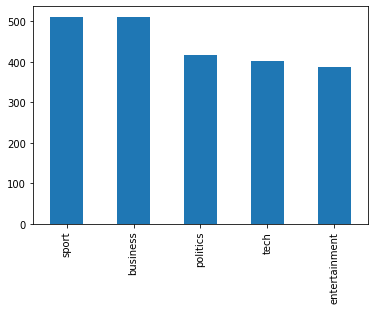

In [13]:
# Checking number of records of each label
df['label'].value_counts().sort_values(ascending=False).plot(kind='bar')

### Encode the labels into numeric

In [14]:
le = LabelEncoder()
df['label'] = le.fit_transform(df['label'])
df.head()

,text,label
0,"Like some drill sergeant from the past, Meta...",4
1,Literally putting a face on technology could...,4
2,"Americans are becoming avid blog readers, wi...",4
3,High-speed net connections in the UK are pro...,4
4,A mobile phone chip which combines a modem a...,4


In [15]:
stopwords = ['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now', 'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won', "won't", 'wouldn', "wouldn't"]

### Perform preprocessing to text

In [16]:
REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
#stopwords = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string
        
        return: modified initial string
    """
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text. substitute the matched string in REPLACE_BY_SPACE_RE with space.
    text = BAD_SYMBOLS_RE.sub('', text) # remove symbols which are in BAD_SYMBOLS_RE from text. substitute the matched string in BAD_SYMBOLS_RE with nothing. 
#     text = re.sub(r'\W+', '', text)
    text = ' '.join(word for word in text.split() if word not in stopwords) # remove stopwors from text
    return text

In [17]:
df['text'] = df['text'].apply(clean_text)
df['text'] = df['text'].str.replace('\d+', '')
df.head()

,text,label
0,like drill sergeant past metal slug wakeup ca...,4
1,literally putting face technology could one ke...,4
2,americans becoming avid blog readers million ...,4
3,highspeed net connections uk proving popular e...,4
4,mobile phone chip combines modem computer proc...,4


### Processing text for BERT model



In [18]:
def get_split(text1):
    l_total = []
    l_parcial = []
    if len(text1.split())//150 >0:
        n = len(text1.split())//150
    else: 
        n = 1
    for w in range(n):
        if w == 0:
            l_parcial = text1.split()[:200]
            l_total.append(" ".join(l_parcial))
        else:
            l_parcial = text1.split()[w*150:w*150 + 200]
            l_total.append(" ".join(l_parcial))
    return l_total

In [19]:
df['text_split'] = df['text'].apply(get_split)
df.head()

,text,label,text_split
0,like drill sergeant past metal slug wakeup ca...,4,[like drill sergeant past metal slug wakeup ca...
1,literally putting face technology could one ke...,4,[literally putting face technology could one k...
2,americans becoming avid blog readers million ...,4,[americans becoming avid blog readers million ...
3,highspeed net connections uk proving popular e...,4,[highspeed net connections uk proving popular ...
4,mobile phone chip combines modem computer proc...,4,[mobile phone chip combines modem computer pro...


Setting output directory for BERT

In [20]:
# Set the output directory for saving model file
OUTPUT_DIR = '/bert_news_category'

#@markdown Whether or not to clear/delete the directory and create a new one
DO_DELETE = True #@param {type:"boolean"}

if DO_DELETE:
    try:
        tf.gfile.DeleteRecursively(OUTPUT_DIR)
#         tf.compat.v1.gfile.DeleteRecursively(OUTPUT_DIR)
    except:
        pass

tf.gfile.MakeDirs(OUTPUT_DIR)
print('***** Model output directory: {} *****'.format(OUTPUT_DIR))

***** Model output directory: /bert_news_category *****


### Split into 80% training and 20% validation

In [21]:
train, val = train_test_split(df, test_size=0.2, random_state=35)
train.reset_index(drop=True, inplace=True)
train.head(2)

,text,label,text_split
0,people using wireless highspeed net wifi warne...,4,[people using wireless highspeed net wifi warn...
1,two days talks future gibraltar begin jack str...,2,[two days talks future gibraltar begin jack st...


In [22]:
# Get labels
label_list = [x for x in np.unique(train.label)]
label_list

[0, 1, 2, 3, 4]

In [23]:
val.reset_index(drop=True, inplace=True)
val.head(2)

,text,label,text_split
0,uk retail sales better expected november chris...,0,[uk retail sales better expected november chri...
1,life insurer axa sun life lowered annual bonus...,0,[life insurer axa sun life lowered annual bonu...


### Check shape of train and validation data

In [24]:
val.shape, train.shape

((445, 3), (1780, 3))

In [25]:
train_l = []
label_l = []
index_l =[]
for idx,row in train.iterrows():
    for l in row['text_split']:
        train_l.append(l)
        label_l.append(row['label'])
        index_l.append(idx)
len(train_l), len(label_l), len(index_l)

(2150, 2150, 2150)

In [26]:
val_l = []
val_label_l = []
val_index_l = []
for idx,row in val.iterrows():
    for l in row['text_split']:
        val_l.append(l)
        val_label_l.append(row['label'])
        val_index_l.append(idx)
len(val_l), len(val_label_l), len(val_index_l)

(564, 564, 564)

### Getting train and validation set as dataframe

In [27]:
train_df = pd.DataFrame({DATA_COLUMN:train_l, LABEL_COLUMN:label_l})
train_df.head()

,text,label
0,people using wireless highspeed net wifi warne...,4
1,protected secure said mr clark vast majority c...,4
2,two days talks future gibraltar begin jack str...,2
3,peertopeer pp networks stay verge exploited co...,4
4,came mr weiss said old media always tries stop...,4


In [28]:
val_df = pd.DataFrame({DATA_COLUMN:val_l, LABEL_COLUMN:val_label_l})
val_df.head()

,text,label
0,uk retail sales better expected november chris...,0
1,life insurer axa sun life lowered annual bonus...,0
2,record numbers schools across uk take part moc...,2
3,ulster clung moraleboosting celtic league win ...,3
4,fiat meet car giant general motors gm tuesday ...,0


In [ ]:
# X_train, X_val, y_train, y_val = train_test_split(df['text'], df['label'], test_size=0.20, random_state=42)

### Fine tuning the BERT model

The BERT model can be applied for any kind of classification task by fine-tuning it.

#### 1. Preparing the input data, i.e create **InputExample** using the BERT’s constructor.

In [29]:
# Use the InputExample class from BERT's run_classifier code to create examples from the data
train_InputExamples = train.apply(lambda x: run_classifier.InputExample(guid=None, # Globally unique ID for bookkeeping, unused in this example
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

val_InputExamples = val.apply(lambda x: run_classifier.InputExample(guid=None, 
                                                                   text_a = x[DATA_COLUMN], 
                                                                   text_b = None, 
                                                                   label = x[LABEL_COLUMN]), axis = 1)

In [30]:
train_InputExamples


0       <bert.run_classifier.InputExample object at 0x...
1       <bert.run_classifier.InputExample object at 0x...
2       <bert.run_classifier.InputExample object at 0x...
3       <bert.run_classifier.InputExample object at 0x...
4       <bert.run_classifier.InputExample object at 0x...
                              ...                        
1775    <bert.run_classifier.InputExample object at 0x...
1776    <bert.run_classifier.InputExample object at 0x...
1777    <bert.run_classifier.InputExample object at 0x...
1778    <bert.run_classifier.InputExample object at 0x...
1779    <bert.run_classifier.InputExample object at 0x...
Length: 1780, dtype: object

In [31]:
print("Row 0 - guid of training set : ", train_InputExamples.iloc[0].guid)
print("\n__________\nRow 0 - text_a of training set : ", train_InputExamples.iloc[0].text_a)
print("\n__________\nRow 0 - text_b of training set : ", train_InputExamples.iloc[0].text_b)
print("\n__________\nRow 0 - label of training set : ", train_InputExamples.iloc[0].label)

Row 0 - guid of training set :  None

__________
Row 0 - text_a of training set :  people using wireless highspeed net wifi warned fake hotspots access points latest threat nicknamed evil twins pose real hotspots actually unauthorised base stations say cranfield university experts logged onto evil twin sensitive data intercepted wifi becoming popular devices come wireless capability london leads global wifi hotspots league   number hotspots expected reach    according analysts users need wary using wifi enabled laptops portable devices order conduct financial transactions anything sensitive personal nature said professor brian collins head information systems cranfield university users also protect ensuring wifi device security measures activated added bt openzone operates vast proportion public hotspots uk told bbc news website made every effort make wifi secure naturally people may security concerns said chris clark chief executive bts wireless broadband wifi networks less vulnerable

In [32]:
BERT_MODEL_HUB = "https://tfhub.dev/google/bert_uncased_L-12_H-768_A-12/1"

def create_tokenizer_from_hub_module():
  """Get the vocab file and casing info from the Hub module."""
  with tf.Graph().as_default():
    bert_module = hub.Module(BERT_MODEL_HUB)
    tokenization_info = bert_module(signature="tokenization_info", as_dict=True)
    with tf.Session() as sess:
#     with tf.compat.v1.Session() as sess:
        vocab_file, do_lower_case = sess.run([tokenization_info["vocab_file"],
                                            tokenization_info["do_lower_case"]])
      
    return tokenization.FullTokenizer(
      vocab_file=vocab_file, do_lower_case=do_lower_case)

tokenizer = create_tokenizer_from_hub_module()

INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


In [33]:
len(tokenizer.vocab.keys())

30522

In [34]:
tokenizer.tokenize("This here's an example of using the BERT tokenizer")

['this',
 'here',
 "'",
 's',
 'an',
 'example',
 'of',
 'using',
 'the',
 'bert',
 'token',
 '##izer']

In [35]:
#Here is what the tokenised sample of the first training set observation looks like
print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

['people', 'using', 'wireless', 'highs', '##peed', 'net', 'wi', '##fi', 'warned', 'fake', 'hot', '##sp', '##ots', 'access', 'points', 'latest', 'threat', 'nicknamed', 'evil', 'twins', 'pose', 'real', 'hot', '##sp', '##ots', 'actually', 'una', '##uth', '##oris', '##ed', 'base', 'stations', 'say', 'cr', '##an', '##field', 'university', 'experts', 'logged', 'onto', 'evil', 'twin', 'sensitive', 'data', 'intercepted', 'wi', '##fi', 'becoming', 'popular', 'devices', 'come', 'wireless', 'capability', 'london', 'leads', 'global', 'wi', '##fi', 'hot', '##sp', '##ots', 'league', 'number', 'hot', '##sp', '##ots', 'expected', 'reach', 'according', 'analysts', 'users', 'need', 'wary', 'using', 'wi', '##fi', 'enabled', 'laptop', '##s', 'portable', 'devices', 'order', 'conduct', 'financial', 'transactions', 'anything', 'sensitive', 'personal', 'nature', 'said', 'professor', 'brian', 'collins', 'head', 'information', 'systems', 'cr', '##an', '##field', 'university', 'users', 'also', 'protect', 'ensuri

In [37]:
# #Here is what the tokenised sample of the first training set observation looks like
# print(tokenizer.tokenize(train_InputExamples.iloc[0].text_a))

#### 2. Converting the train and validation features to InputFeatures that BERT understands.

In [36]:
MAX_SEQ_LENGTH = 200

train_features = run_classifier.convert_examples_to_features(train_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

val_features = run_classifier.convert_examples_to_features(val_InputExamples, label_list, MAX_SEQ_LENGTH, tokenizer)

INFO:tensorflow:Writing example 0 of 1780


INFO:tensorflow:Writing example 0 of 1780


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] people using wireless highs ##peed net wi ##fi warned fake hot ##sp ##ots access points latest threat nicknamed evil twins pose real hot ##sp ##ots actually una ##uth ##oris ##ed base stations say cr ##an ##field university experts logged onto evil twin sensitive data intercepted wi ##fi becoming popular devices come wireless capability london leads global wi ##fi hot ##sp ##ots league number hot ##sp ##ots expected reach according analysts users need wary using wi ##fi enabled laptop ##s portable devices order conduct financial transactions anything sensitive personal nature said professor brian collins head information systems cr ##an ##field university users also protect ensuring wi ##fi device security measures activated added bt open ##zone operates vast proportion public hot ##sp ##ots uk told bbc news website made every effort make wi ##fi secure naturally people may security concerns said chris clark chief executive bt ##s wireless broadband wi ##f

INFO:tensorflow:tokens: [CLS] people using wireless highs ##peed net wi ##fi warned fake hot ##sp ##ots access points latest threat nicknamed evil twins pose real hot ##sp ##ots actually una ##uth ##oris ##ed base stations say cr ##an ##field university experts logged onto evil twin sensitive data intercepted wi ##fi becoming popular devices come wireless capability london leads global wi ##fi hot ##sp ##ots league number hot ##sp ##ots expected reach according analysts users need wary using wi ##fi enabled laptop ##s portable devices order conduct financial transactions anything sensitive personal nature said professor brian collins head information systems cr ##an ##field university users also protect ensuring wi ##fi device security measures activated added bt open ##zone operates vast proportion public hot ##sp ##ots uk told bbc news website made every effort make wi ##fi secure naturally people may security concerns said chris clark chief executive bt ##s wireless broadband wi ##f

INFO:tensorflow:input_ids: 101 2111 2478 9949 26836 25599 5658 15536 8873 7420 8275 2980 13102 12868 3229 2685 6745 5081 9919 4763 8178 13382 2613 2980 13102 12868 2941 14477 14317 21239 2098 2918 3703 2360 13675 2319 3790 2118 8519 26618 3031 4763 5519 7591 2951 16618 15536 8873 3352 2759 5733 2272 9949 10673 2414 5260 3795 15536 8873 2980 13102 12868 2223 2193 2980 13102 12868 3517 3362 2429 18288 5198 2342 15705 2478 15536 8873 9124 12191 2015 12109 5733 2344 6204 3361 11817 2505 7591 3167 3267 2056 2934 4422 6868 2132 2592 3001 13675 2319 3790 2118 5198 2036 4047 12725 15536 8873 5080 3036 5761 8878 2794 18411 2330 15975 5748 6565 10817 2270 2980 13102 12868 2866 2409 4035 2739 4037 2081 2296 3947 2191 15536 8873 5851 8100 2111 2089 3036 5936 2056 3782 5215 2708 3237 18411 2015 9949 19595 15536 8873 6125 2625 8211 2965 3229 2075 4274 2066 19595 13764 6279 2056 18411 2330 15975 2092 2500 12138 21999 2707 8833 2378 2832 2326 2980 13102 4140 2965 5198 3167 2592 2951 8154 2078 5310 184

INFO:tensorflow:input_ids: 101 2111 2478 9949 26836 25599 5658 15536 8873 7420 8275 2980 13102 12868 3229 2685 6745 5081 9919 4763 8178 13382 2613 2980 13102 12868 2941 14477 14317 21239 2098 2918 3703 2360 13675 2319 3790 2118 8519 26618 3031 4763 5519 7591 2951 16618 15536 8873 3352 2759 5733 2272 9949 10673 2414 5260 3795 15536 8873 2980 13102 12868 2223 2193 2980 13102 12868 3517 3362 2429 18288 5198 2342 15705 2478 15536 8873 9124 12191 2015 12109 5733 2344 6204 3361 11817 2505 7591 3167 3267 2056 2934 4422 6868 2132 2592 3001 13675 2319 3790 2118 5198 2036 4047 12725 15536 8873 5080 3036 5761 8878 2794 18411 2330 15975 5748 6565 10817 2270 2980 13102 12868 2866 2409 4035 2739 4037 2081 2296 3947 2191 15536 8873 5851 8100 2111 2089 3036 5936 2056 3782 5215 2708 3237 18411 2015 9949 19595 15536 8873 6125 2625 8211 2965 3229 2075 4274 2066 19595 13764 6279 2056 18411 2330 15975 2092 2500 12138 21999 2707 8833 2378 2832 2326 2980 13102 4140 2965 5198 3167 2592 2951 8154 2078 5310 184

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] two days talks future gibraltar begin jack straw ##s country residence later wednesday officials two ##day summit foreign secretary ##s official kent house che ##ven ##ing plan new forum rocks future october mr straw spanish counterpart miguel mora ##tino ##s agreed establish body would give gibraltar ##ians voice future gibraltar ##ians said referendum wanted remain british gibraltar ##s chief minister peter car ##uan ##a represent british citizens living rock britain ##s europe director dominic ##k chi ##lco ##tt represent uk madrid represented spain ##s director general europe jose maria po ##ns initiative follows spain ##s socialist governments decision put long ##standing sovereignty ambitions hold gibraltar ##ians rejected plans rocks sovereignty shared britain spain referendum organised gibraltar government [SEP]


INFO:tensorflow:tokens: [CLS] two days talks future gibraltar begin jack straw ##s country residence later wednesday officials two ##day summit foreign secretary ##s official kent house che ##ven ##ing plan new forum rocks future october mr straw spanish counterpart miguel mora ##tino ##s agreed establish body would give gibraltar ##ians voice future gibraltar ##ians said referendum wanted remain british gibraltar ##s chief minister peter car ##uan ##a represent british citizens living rock britain ##s europe director dominic ##k chi ##lco ##tt represent uk madrid represented spain ##s director general europe jose maria po ##ns initiative follows spain ##s socialist governments decision put long ##standing sovereignty ambitions hold gibraltar ##ians rejected plans rocks sovereignty shared britain spain referendum organised gibraltar government [SEP]


INFO:tensorflow:input_ids: 101 2048 2420 7566 2925 12272 4088 2990 13137 2015 2406 5039 2101 9317 4584 2048 10259 6465 3097 3187 2015 2880 5982 2160 18178 8159 2075 2933 2047 7057 5749 2925 2255 2720 13137 3009 13637 8374 26821 25690 2015 3530 5323 2303 2052 2507 12272 7066 2376 2925 12272 7066 2056 9782 2359 3961 2329 12272 2015 2708 2704 2848 2482 13860 2050 5050 2329 4480 2542 2600 3725 2015 2885 2472 11282 2243 9610 22499 4779 5050 2866 6921 3421 3577 2015 2472 2236 2885 4560 3814 13433 3619 6349 4076 3577 2015 6102 6867 3247 2404 2146 24911 12601 19509 2907 12272 7066 5837 3488 5749 12601 4207 3725 3577 9782 7362 12272 2231 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2048 2420 7566 2925 12272 4088 2990 13137 2015 2406 5039 2101 9317 4584 2048 10259 6465 3097 3187 2015 2880 5982 2160 18178 8159 2075 2933 2047 7057 5749 2925 2255 2720 13137 3009 13637 8374 26821 25690 2015 3530 5323 2303 2052 2507 12272 7066 2376 2925 12272 7066 2056 9782 2359 3961 2329 12272 2015 2708 2704 2848 2482 13860 2050 5050 2329 4480 2542 2600 3725 2015 2885 2472 11282 2243 9610 22499 4779 5050 2866 6921 3421 3577 2015 2472 2236 2885 4560 3814 13433 3619 6349 4076 3577 2015 6102 6867 3247 2404 2146 24911 12601 19509 2907 12272 7066 5837 3488 5749 12601 4207 3725 3577 9782 7362 12272 2231 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] peer ##top ##eer pp networks stay verge exploited commercial media firms says panel industry experts several high ##pro ##fi ##le legal cases files ##har ##ers resolved year firms keen try make money pp technology expert panel probe ##d future pp consumer electronics show las vegas earlier january first convictions pp piracy handed us january william tr ##ow ##bridge michael chico ##ine pleaded guilty charges in ##fr ##inge ##d copyright illegally sharing music movies software since first successful files ##hari ##ng network nap ##ster forced close entertainment industry nervous critical pp technology blaming falling sales piracy going change soon according panel music film industries started big legal cases owners legitimate pp networks illegal individuals accused distributing pirate ##d content networks slowly realised pp good way distribute content said travis kala ##nick founder chairman pp network red sw ##oo ##sh soon going want slice waiting come bu

INFO:tensorflow:tokens: [CLS] peer ##top ##eer pp networks stay verge exploited commercial media firms says panel industry experts several high ##pro ##fi ##le legal cases files ##har ##ers resolved year firms keen try make money pp technology expert panel probe ##d future pp consumer electronics show las vegas earlier january first convictions pp piracy handed us january william tr ##ow ##bridge michael chico ##ine pleaded guilty charges in ##fr ##inge ##d copyright illegally sharing music movies software since first successful files ##hari ##ng network nap ##ster forced close entertainment industry nervous critical pp technology blaming falling sales piracy going change soon according panel music film industries started big legal cases owners legitimate pp networks illegal individuals accused distributing pirate ##d content networks slowly realised pp good way distribute content said travis kala ##nick founder chairman pp network red sw ##oo ##sh soon going want slice waiting come bu

INFO:tensorflow:input_ids: 101 8152 14399 11510 4903 6125 2994 16079 18516 3293 2865 9786 2758 5997 3068 8519 2195 2152 21572 8873 2571 3423 3572 6764 8167 2545 10395 2095 9786 10326 3046 2191 2769 4903 2974 6739 5997 15113 2094 2925 4903 7325 8139 2265 5869 7136 3041 2254 2034 20488 4903 24386 4375 2149 2254 2520 19817 5004 6374 2745 22136 3170 12254 5905 5571 1999 19699 23496 2094 9385 17800 6631 2189 5691 4007 2144 2034 3144 6764 18428 3070 2897 18996 6238 3140 2485 4024 3068 6091 4187 4903 2974 24114 4634 4341 24386 2183 2689 2574 2429 5997 2189 2143 6088 2318 2502 3423 3572 5608 11476 4903 6125 6206 3633 5496 20083 11304 2094 4180 6125 3254 11323 4903 2204 2126 16062 4180 2056 10001 26209 13542 3910 3472 4903 2897 2417 25430 9541 4095 2574 2183 2215 14704 3403 2272 2449 4275 2147 2950 3617 2916 2968 6100 21572 26557 3508 4781 3423 4506 10395 21470 4903 3685 4148 2056 2745 17889 2343 5460 10526 6125 10397 6519 5686 2105 18315 2869 2034 2234 2720 17889 2056 2214 2865 2467 5363 2644 

INFO:tensorflow:input_ids: 101 8152 14399 11510 4903 6125 2994 16079 18516 3293 2865 9786 2758 5997 3068 8519 2195 2152 21572 8873 2571 3423 3572 6764 8167 2545 10395 2095 9786 10326 3046 2191 2769 4903 2974 6739 5997 15113 2094 2925 4903 7325 8139 2265 5869 7136 3041 2254 2034 20488 4903 24386 4375 2149 2254 2520 19817 5004 6374 2745 22136 3170 12254 5905 5571 1999 19699 23496 2094 9385 17800 6631 2189 5691 4007 2144 2034 3144 6764 18428 3070 2897 18996 6238 3140 2485 4024 3068 6091 4187 4903 2974 24114 4634 4341 24386 2183 2689 2574 2429 5997 2189 2143 6088 2318 2502 3423 3572 5608 11476 4903 6125 6206 3633 5496 20083 11304 2094 4180 6125 3254 11323 4903 2204 2126 16062 4180 2056 10001 26209 13542 3910 3472 4903 2897 2417 25430 9541 4095 2574 2183 2215 14704 3403 2272 2449 4275 2147 2950 3617 2916 2968 6100 21572 26557 3508 4781 3423 4506 10395 21470 4903 3685 4148 2056 2745 17889 2343 5460 10526 6125 10397 6519 5686 2105 18315 2869 2034 2234 2720 17889 2056 2214 2865 2467 5363 2644 

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:label: 4 (id = 4)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] athletics fans endured year mixed emotions stunning victories went hand ##in ##hand disappointing defeats drugs scandals kelly holmes finally fulfilled potential storm ##ing double gold track olympic games holmes helped erase gloom hanging team gb biggest medal hope paula radcliffe dropped marathon m britain ##s men ##s x ##m relay team also bit taking shock gold holmes started year disappointing style falling final m world indoor championships favourite olympic build ##up clouded self doubt proved un ##founded overhaul ##ed rival maria mu ##to ##la win m first global title five days later year ##old made double gold m first time years brit ##on achieved olympic middle ##dis ##tance double holmes left athens star team gb radcliffe carried expectations august games year ##old marathon world record holder went athens event favourite exhausted radcliffe dropped miles tears decision enter m five days later also back ##fire ##d pulled eight laps remaining radcl

INFO:tensorflow:tokens: [CLS] athletics fans endured year mixed emotions stunning victories went hand ##in ##hand disappointing defeats drugs scandals kelly holmes finally fulfilled potential storm ##ing double gold track olympic games holmes helped erase gloom hanging team gb biggest medal hope paula radcliffe dropped marathon m britain ##s men ##s x ##m relay team also bit taking shock gold holmes started year disappointing style falling final m world indoor championships favourite olympic build ##up clouded self doubt proved un ##founded overhaul ##ed rival maria mu ##to ##la win m first global title five days later year ##old made double gold m first time years brit ##on achieved olympic middle ##dis ##tance double holmes left athens star team gb radcliffe carried expectations august games year ##old marathon world record holder went athens event favourite exhausted radcliffe dropped miles tears decision enter m five days later also back ##fire ##d pulled eight laps remaining radcl

INFO:tensorflow:input_ids: 101 6482 4599 16753 2095 3816 6699 14726 9248 2253 2192 2378 11774 15640 14222 5850 29609 5163 9106 2633 16829 4022 4040 2075 3313 2751 2650 4386 2399 9106 3271 22505 24067 5689 2136 16351 5221 3101 3246 13723 22603 3333 8589 1049 3725 2015 2273 2015 1060 2213 8846 2136 2036 2978 2635 5213 2751 9106 2318 2095 15640 2806 4634 2345 1049 2088 7169 3219 8837 4386 3857 6279 26761 2969 4797 4928 4895 21001 18181 2098 6538 3814 14163 3406 2721 2663 1049 2034 3795 2516 2274 2420 2101 2095 11614 2081 3313 2751 1049 2034 2051 2086 28101 2239 4719 4386 2690 10521 26897 3313 9106 2187 7571 2732 2136 16351 22603 3344 10908 2257 2399 2095 11614 8589 2088 2501 9111 2253 7571 2724 8837 9069 22603 3333 2661 4000 3247 4607 1049 2274 2420 2101 2036 2067 10273 2094 2766 2809 10876 3588 22603 3271 2404 4386 12603 2369 26162 2663 2281 2015 2047 2259 8589 1060 2213 2136 4046 2197 12617 2361 8294 2329 2273 2015 4386 4686 3532 2707 2399 2790 2295 7571 2052 2034 2399 2273 2052 8246 26

INFO:tensorflow:input_ids: 101 6482 4599 16753 2095 3816 6699 14726 9248 2253 2192 2378 11774 15640 14222 5850 29609 5163 9106 2633 16829 4022 4040 2075 3313 2751 2650 4386 2399 9106 3271 22505 24067 5689 2136 16351 5221 3101 3246 13723 22603 3333 8589 1049 3725 2015 2273 2015 1060 2213 8846 2136 2036 2978 2635 5213 2751 9106 2318 2095 15640 2806 4634 2345 1049 2088 7169 3219 8837 4386 3857 6279 26761 2969 4797 4928 4895 21001 18181 2098 6538 3814 14163 3406 2721 2663 1049 2034 3795 2516 2274 2420 2101 2095 11614 2081 3313 2751 1049 2034 2051 2086 28101 2239 4719 4386 2690 10521 26897 3313 9106 2187 7571 2732 2136 16351 22603 3344 10908 2257 2399 2095 11614 8589 2088 2501 9111 2253 7571 2724 8837 9069 22603 3333 2661 4000 3247 4607 1049 2274 2420 2101 2036 2067 10273 2094 2766 2809 10876 3588 22603 3271 2404 4386 12603 2369 26162 2663 2281 2015 2047 2259 8589 1060 2213 2136 4046 2197 12617 2361 8294 2329 2273 2015 4386 4686 3532 2707 2399 2790 2295 7571 2052 2034 2399 2273 2052 8246 26

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] labour accused using anti ##se ##mit ##ic images posters critics claim depict tory leader michael howard fa ##gin poster shows mr howard h ##yp ##not ##ising people pocket watch saying spend money twice image prompted concern editor jewish chronicle labour insists simply anti ##tory labour later took image website saying alternative idea proved popular party members party use focus groups test poster showing mr howard shadow chancellor oliver let ##win black ##board reading + h ##yp ##not ##ism poster compared portrayal dickens character fa ##gin stage version musical oliver controversy another poster choice offered labour members showed mr howard mr let ##win jewish flying pigs mr howard comment anti ##se ##mit ##ism claims asked poster monday instead pointed tony blair complained personal ##ised abusive campaigning mr howard told greater manchester radio pity mr blair doesn ##t pr ##act ##ise preach ##es jewish chronicle editor ned te ##m ##ko said mixed

INFO:tensorflow:tokens: [CLS] labour accused using anti ##se ##mit ##ic images posters critics claim depict tory leader michael howard fa ##gin poster shows mr howard h ##yp ##not ##ising people pocket watch saying spend money twice image prompted concern editor jewish chronicle labour insists simply anti ##tory labour later took image website saying alternative idea proved popular party members party use focus groups test poster showing mr howard shadow chancellor oliver let ##win black ##board reading + h ##yp ##not ##ism poster compared portrayal dickens character fa ##gin stage version musical oliver controversy another poster choice offered labour members showed mr howard mr let ##win jewish flying pigs mr howard comment anti ##se ##mit ##ism claims asked poster monday instead pointed tony blair complained personal ##ised abusive campaigning mr howard told greater manchester radio pity mr blair doesn ##t pr ##act ##ise preach ##es jewish chronicle editor ned te ##m ##ko said mixed

INFO:tensorflow:input_ids: 101 4428 5496 2478 3424 3366 22930 2594 4871 14921 4401 4366 17120 17117 3003 2745 4922 6904 11528 13082 3065 2720 4922 1044 22571 17048 9355 2111 4979 3422 3038 5247 2769 3807 3746 9469 5142 3559 3644 9519 4428 16818 3432 3424 7062 4428 2101 2165 3746 4037 3038 4522 2801 4928 2759 2283 2372 2283 2224 3579 2967 3231 13082 4760 2720 4922 5192 7306 6291 2292 10105 2304 6277 3752 1009 1044 22571 17048 2964 13082 4102 13954 19675 2839 6904 11528 2754 2544 3315 6291 6704 2178 13082 3601 3253 4428 2372 3662 2720 4922 2720 2292 10105 3644 3909 14695 2720 4922 7615 3424 3366 22930 2964 4447 2356 13082 6928 2612 4197 4116 10503 10865 3167 5084 20676 18524 2720 4922 2409 3618 5087 2557 12063 2720 10503 2987 2102 10975 18908 5562 25250 2229 3644 9519 3559 12311 8915 2213 3683 2056 3816 4668 2034 13082 22028 3644 9519 8141 3662 6748 5142 1044 22571 17048 2964 3746 11004 7878 6904 11528 1999 10288 12412 8231 5799 21951 4693 11614 18024 2409 4035 2557 1055 2088 2028 3649 2

INFO:tensorflow:input_ids: 101 4428 5496 2478 3424 3366 22930 2594 4871 14921 4401 4366 17120 17117 3003 2745 4922 6904 11528 13082 3065 2720 4922 1044 22571 17048 9355 2111 4979 3422 3038 5247 2769 3807 3746 9469 5142 3559 3644 9519 4428 16818 3432 3424 7062 4428 2101 2165 3746 4037 3038 4522 2801 4928 2759 2283 2372 2283 2224 3579 2967 3231 13082 4760 2720 4922 5192 7306 6291 2292 10105 2304 6277 3752 1009 1044 22571 17048 2964 13082 4102 13954 19675 2839 6904 11528 2754 2544 3315 6291 6704 2178 13082 3601 3253 4428 2372 3662 2720 4922 2720 2292 10105 3644 3909 14695 2720 4922 7615 3424 3366 22930 2964 4447 2356 13082 6928 2612 4197 4116 10503 10865 3167 5084 20676 18524 2720 4922 2409 3618 5087 2557 12063 2720 10503 2987 2102 10975 18908 5562 25250 2229 3644 9519 3559 12311 8915 2213 3683 2056 3816 4668 2034 13082 22028 3644 9519 8141 3662 6748 5142 1044 22571 17048 2964 3746 11004 7878 6904 11528 1999 10288 12412 8231 5799 21951 4693 11614 18024 2409 4035 2557 1055 2088 2028 3649 2

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:Writing example 0 of 445


INFO:tensorflow:Writing example 0 of 445


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] uk retail sales better expected november christmas shop ##pers began seasonal flock high street figures show office national statistics on ##s said retail sales rose month year figures along weeks inflation report could trigger another interest rate rise new year however recent data british retail consortium showed slip high street sales november on ##s data con ##founded analyst expectations many expected sales fall slightly november shop ##pers put buying christmas presents december however retailers attempts draw crowds may behind november ##s unexpected rise sales say aggressive tactics one ##day discount sales adopted stores marks spencer appear paid price discount ##ing certainly accounted much value retail sales hasn ##t grown much volumes said invest ##ec economist david page figures sparked rally sterling data supported view early assume base rates peaked [SEP]


INFO:tensorflow:tokens: [CLS] uk retail sales better expected november christmas shop ##pers began seasonal flock high street figures show office national statistics on ##s said retail sales rose month year figures along weeks inflation report could trigger another interest rate rise new year however recent data british retail consortium showed slip high street sales november on ##s data con ##founded analyst expectations many expected sales fall slightly november shop ##pers put buying christmas presents december however retailers attempts draw crowds may behind november ##s unexpected rise sales say aggressive tactics one ##day discount sales adopted stores marks spencer appear paid price discount ##ing certainly accounted much value retail sales hasn ##t grown much volumes said invest ##ec economist david page figures sparked rally sterling data supported view early assume base rates peaked [SEP]


INFO:tensorflow:input_ids: 101 2866 7027 4341 2488 3517 2281 4234 4497 7347 2211 12348 19311 2152 2395 4481 2265 2436 2120 6747 2006 2015 2056 7027 4341 3123 3204 2095 4481 2247 3134 14200 3189 2071 9495 2178 3037 3446 4125 2047 2095 2174 3522 2951 2329 7027 12360 3662 7540 2152 2395 4341 2281 2006 2015 2951 9530 21001 12941 10908 2116 3517 4341 2991 3621 2281 4497 7347 2404 9343 4234 7534 2285 2174 16629 4740 4009 12783 2089 2369 2281 2015 9223 4125 4341 2360 9376 9887 2028 10259 19575 4341 4233 5324 6017 7084 3711 3825 3976 19575 2075 5121 14729 2172 3643 7027 4341 8440 2102 4961 2172 6702 2056 15697 8586 11708 2585 3931 4481 13977 8320 10933 2951 3569 3193 2220 7868 2918 6165 6601 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2866 7027 4341 2488 3517 2281 4234 4497 7347 2211 12348 19311 2152 2395 4481 2265 2436 2120 6747 2006 2015 2056 7027 4341 3123 3204 2095 4481 2247 3134 14200 3189 2071 9495 2178 3037 3446 4125 2047 2095 2174 3522 2951 2329 7027 12360 3662 7540 2152 2395 4341 2281 2006 2015 2951 9530 21001 12941 10908 2116 3517 4341 2991 3621 2281 4497 7347 2404 9343 4234 7534 2285 2174 16629 4740 4009 12783 2089 2369 2281 2015 9223 4125 4341 2360 9376 9887 2028 10259 19575 4341 4233 5324 6017 7084 3711 3825 3976 19575 2075 5121 14729 2172 3643 7027 4341 8440 2102 4961 2172 6702 2056 15697 8586 11708 2585 3931 4481 13977 8320 10933 2951 3569 3193 2220 7868 2918 6165 6601 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] life ins ##urer ax ##a sun life lowered annual bonus pay ##outs with ##pro ##fi ##ts investors regular annual bonus rates former ax ##a equity law with ##pro ##fi ##ts policies cut ax ##a blamed poor stock market performance cut adding recent gains yet offset market falls seen cut hit estimated ax ##as policy ##holders rest know fate march cuts ax ##as policies mean policy ##holder invested month endowment policy past years would see final maturity pay ##out e ##qua ##ted annual investment growth rate ax ##a said with ##pro ##fi ##ts policies designed smooth peaks trough ##s stock market vol ##ati ##lity however heavy stock market falls throughout forced firms trim bonus rates policies stock market grown past months however enough undo damage occurred ax ##a spokesman mark hamilton ax ##a spokesman told bbc news ax ##a cut pay ##outs investors last january [SEP]


INFO:tensorflow:tokens: [CLS] life ins ##urer ax ##a sun life lowered annual bonus pay ##outs with ##pro ##fi ##ts investors regular annual bonus rates former ax ##a equity law with ##pro ##fi ##ts policies cut ax ##a blamed poor stock market performance cut adding recent gains yet offset market falls seen cut hit estimated ax ##as policy ##holders rest know fate march cuts ax ##as policies mean policy ##holder invested month endowment policy past years would see final maturity pay ##out e ##qua ##ted annual investment growth rate ax ##a said with ##pro ##fi ##ts policies designed smooth peaks trough ##s stock market vol ##ati ##lity however heavy stock market falls throughout forced firms trim bonus rates policies stock market grown past months however enough undo damage occurred ax ##a spokesman mark hamilton ax ##a spokesman told bbc news ax ##a cut pay ##outs investors last january [SEP]


INFO:tensorflow:input_ids: 101 2166 16021 27595 22260 2050 3103 2166 6668 3296 6781 3477 12166 2007 21572 8873 3215 9387 3180 3296 6781 6165 2280 22260 2050 10067 2375 2007 21572 8873 3215 6043 3013 22260 2050 11248 3532 4518 3006 2836 3013 5815 3522 12154 2664 16396 3006 4212 2464 3013 2718 4358 22260 3022 3343 17794 2717 2113 6580 2233 7659 22260 3022 6043 2812 3343 14528 11241 3204 15108 3343 2627 2086 2052 2156 2345 16736 3477 5833 1041 16211 3064 3296 5211 3930 3446 22260 2050 2056 2007 21572 8873 3215 6043 2881 5744 11373 23389 2015 4518 3006 5285 10450 18605 2174 3082 4518 3006 4212 2802 3140 9786 12241 6781 6165 6043 4518 3006 4961 2627 2706 2174 2438 25672 4053 4158 22260 2050 14056 2928 5226 22260 2050 14056 2409 4035 2739 22260 2050 3013 3477 12166 9387 2197 2254 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2166 16021 27595 22260 2050 3103 2166 6668 3296 6781 3477 12166 2007 21572 8873 3215 9387 3180 3296 6781 6165 2280 22260 2050 10067 2375 2007 21572 8873 3215 6043 3013 22260 2050 11248 3532 4518 3006 2836 3013 5815 3522 12154 2664 16396 3006 4212 2464 3013 2718 4358 22260 3022 3343 17794 2717 2113 6580 2233 7659 22260 3022 6043 2812 3343 14528 11241 3204 15108 3343 2627 2086 2052 2156 2345 16736 3477 5833 1041 16211 3064 3296 5211 3930 3446 22260 2050 2056 2007 21572 8873 3215 6043 2881 5744 11373 23389 2015 4518 3006 5285 10450 18605 2174 3082 4518 3006 4212 2802 3140 9786 12241 6781 6165 6043 4518 3006 4961 2627 2706 2174 2438 25672 4053 4158 22260 2050 14056 2928 5226 22260 2050 14056 2409 4035 2739 22260 2050 3013 3477 12166 9387 2197 2254 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] record numbers schools across uk take part mock general election backed government schools already signed vote mock elections run hans ##ard society aimed boost ##ing interest politics pupils schools taking part learn skills speech writers canvas ##ser ##s political candidates schools minister stephen t ##wig ##g said engaging young peoples interest essential future democracy added said young people engaged motivated political process essential future health democracy mock elections initiative provides opportunity pupils develop understanding democratic process works matters experiencing election process first hand running campaign declaration final result hope young people develop enthusiasm take part future hans ##ard society electoral commission department education skills running programme pupils stand party candidates speech writers canvas ##ser ##s michael raft ##ery project manager hans ##ard society said vote mock elections schools mirror excitemen

INFO:tensorflow:tokens: [CLS] record numbers schools across uk take part mock general election backed government schools already signed vote mock elections run hans ##ard society aimed boost ##ing interest politics pupils schools taking part learn skills speech writers canvas ##ser ##s political candidates schools minister stephen t ##wig ##g said engaging young peoples interest essential future democracy added said young people engaged motivated political process essential future health democracy mock elections initiative provides opportunity pupils develop understanding democratic process works matters experiencing election process first hand running campaign declaration final result hope young people develop enthusiasm take part future hans ##ard society electoral commission department education skills running programme pupils stand party candidates speech writers canvas ##ser ##s michael raft ##ery project manager hans ##ard society said vote mock elections schools mirror excitemen

INFO:tensorflow:input_ids: 101 2501 3616 2816 2408 2866 2202 2112 12934 2236 2602 6153 2231 2816 2525 2772 3789 12934 3864 2448 7003 4232 2554 6461 12992 2075 3037 4331 7391 2816 2635 2112 4553 4813 4613 4898 10683 8043 2015 2576 5347 2816 2704 4459 1056 16279 2290 2056 11973 2402 7243 3037 6827 2925 7072 2794 2056 2402 2111 5117 12774 2576 2832 6827 2925 2740 7072 12934 3864 6349 3640 4495 7391 4503 4824 3537 2832 2573 5609 13417 2602 2832 2034 2192 2770 3049 8170 2345 2765 3246 2402 2111 4503 12024 2202 2112 2925 7003 4232 2554 6092 3222 2533 2495 4813 2770 4746 7391 3233 2283 5347 4613 4898 10683 8043 2015 2745 21298 7301 2622 3208 7003 4232 2554 2056 3789 12934 3864 2816 5259 8277 12610 2613 2602 6274 7073 9068 6666 3161 7072 12934 4494 2202 2173 2105 2089 4235 3517 3058 2236 2602 2592 15173 2164 10428 4981 17124 12468 3864 6230 2220 2089 2741 2816 4778 2202 2112 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_ids: 101 2501 3616 2816 2408 2866 2202 2112 12934 2236 2602 6153 2231 2816 2525 2772 3789 12934 3864 2448 7003 4232 2554 6461 12992 2075 3037 4331 7391 2816 2635 2112 4553 4813 4613 4898 10683 8043 2015 2576 5347 2816 2704 4459 1056 16279 2290 2056 11973 2402 7243 3037 6827 2925 7072 2794 2056 2402 2111 5117 12774 2576 2832 6827 2925 2740 7072 12934 3864 6349 3640 4495 7391 4503 4824 3537 2832 2573 5609 13417 2602 2832 2034 2192 2770 3049 8170 2345 2765 3246 2402 2111 4503 12024 2202 2112 2925 7003 4232 2554 6092 3222 2533 2495 4813 2770 4746 7391 3233 2283 5347 4613 4898 10683 8043 2015 2745 21298 7301 2622 3208 7003 4232 2554 2056 3789 12934 3864 2816 5259 8277 12610 2613 2602 6274 7073 9068 6666 3161 7072 12934 4494 2202 2173 2105 2089 4235 3517 3058 2236 2602 2592 15173 2164 10428 4981 17124 12468 3864 6230 2220 2089 2741 2816 4778 2202 2112 102 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:label: 2 (id = 2)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] ulster clung morale ##bo ##ost ##ing celtic league win bottom club borders net ##her ##dale friday night late try borders substitute jonny weston set dramatic finish scottish side could complete fight ##back ulster led tries paul stein ##met ##z bryn cunningham irish province failed add tally second half ended relieved get win lift eighth place table borders edged ahead sixth ##min ##ute penalty charlie ho ##re hand visitors initiative via gift try cal ##um mac ##rae surrendered possession centre stein ##met ##z sent chip danger zone substitute joe patti ##son come injured gareth morton wrongly thought ball trick ##ling play eased chase speedy stein ##met ##z ideas raced get vital touch nick time giving adam larkin easy conversion ally warn ##ock clawed back three points borders soon hit another double ##bl ##ow first mark blair yellow card ##ed killing ball ground fullback cunningham bag ##ged second touchdown wake fine work skipper andy ward larkin added

INFO:tensorflow:tokens: [CLS] ulster clung morale ##bo ##ost ##ing celtic league win bottom club borders net ##her ##dale friday night late try borders substitute jonny weston set dramatic finish scottish side could complete fight ##back ulster led tries paul stein ##met ##z bryn cunningham irish province failed add tally second half ended relieved get win lift eighth place table borders edged ahead sixth ##min ##ute penalty charlie ho ##re hand visitors initiative via gift try cal ##um mac ##rae surrendered possession centre stein ##met ##z sent chip danger zone substitute joe patti ##son come injured gareth morton wrongly thought ball trick ##ling play eased chase speedy stein ##met ##z ideas raced get vital touch nick time giving adam larkin easy conversion ally warn ##ock clawed back three points borders soon hit another double ##bl ##ow first mark blair yellow card ##ed killing ball ground fullback cunningham bag ##ged second touchdown wake fine work skipper andy ward larkin added

INFO:tensorflow:input_ids: 101 11059 14752 19292 5092 14122 2075 8730 2223 2663 3953 2252 6645 5658 5886 5634 5958 2305 2397 3046 6645 7681 26937 12755 2275 6918 3926 4104 2217 2071 3143 2954 5963 11059 2419 5363 2703 14233 11368 2480 19904 13652 3493 2874 3478 5587 19552 2117 2431 3092 7653 2131 2663 6336 5964 2173 2795 6645 13011 3805 4369 10020 10421 6531 4918 7570 2890 2192 5731 6349 3081 5592 3046 10250 2819 6097 16652 10795 6664 2803 14233 11368 2480 2741 9090 5473 4224 7681 3533 22732 3385 2272 5229 20243 11164 29116 2245 3608 7577 2989 2377 10987 5252 26203 14233 11368 2480 4784 8255 2131 8995 3543 4172 2051 3228 4205 25570 3733 7584 9698 11582 7432 22544 2067 2093 2685 6645 2574 2718 2178 3313 16558 5004 2034 2928 10503 3756 4003 2098 4288 3608 2598 21803 13652 4524 5999 2117 7921 5256 2986 2147 23249 5557 4829 25570 2794 26279 2130 4788 2272 6645 25570 6476 2048 12408 3338 2117 2036 2419 5163 2829 8254 8428 7228 6184 2435 1043 17960 5017 3246 3202 23818 2174 11582 7432 4930 6

INFO:tensorflow:input_ids: 101 11059 14752 19292 5092 14122 2075 8730 2223 2663 3953 2252 6645 5658 5886 5634 5958 2305 2397 3046 6645 7681 26937 12755 2275 6918 3926 4104 2217 2071 3143 2954 5963 11059 2419 5363 2703 14233 11368 2480 19904 13652 3493 2874 3478 5587 19552 2117 2431 3092 7653 2131 2663 6336 5964 2173 2795 6645 13011 3805 4369 10020 10421 6531 4918 7570 2890 2192 5731 6349 3081 5592 3046 10250 2819 6097 16652 10795 6664 2803 14233 11368 2480 2741 9090 5473 4224 7681 3533 22732 3385 2272 5229 20243 11164 29116 2245 3608 7577 2989 2377 10987 5252 26203 14233 11368 2480 4784 8255 2131 8995 3543 4172 2051 3228 4205 25570 3733 7584 9698 11582 7432 22544 2067 2093 2685 6645 2574 2718 2178 3313 16558 5004 2034 2928 10503 3756 4003 2098 4288 3608 2598 21803 13652 4524 5999 2117 7921 5256 2986 2147 23249 5557 4829 25570 2794 26279 2130 4788 2272 6645 25570 6476 2048 12408 3338 2117 2036 2419 5163 2829 8254 8428 7228 6184 2435 1043 17960 5017 3246 3202 23818 2174 11582 7432 4930 6

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:label: 3 (id = 3)


INFO:tensorflow:*** Example ***


INFO:tensorflow:*** Example ***


INFO:tensorflow:guid: None


INFO:tensorflow:guid: None


INFO:tensorflow:tokens: [CLS] fiat meet car giant general motors gm tuesday attempt reach agreement future italian firms loss ##making auto group fiat claims gm legally obliged buy car unit already gm says contract signed longer valid press reports speculated fiat may willing accept cash payment return dropping claim companies want cut costs car industry adjust ##s wan ##ing demand meeting fiat boss sergio march ##ion ##ne gm ##s rick wagon ##er due take place gm ##t zurich according reuters news agency mr march ##ion ##ne confident firms legal position saying interview financial times gm ##s argument legs agreement question dates back gm ##s decision buy fiat ##s auto division time gave italian firm right via put option sell remaining stake gm recent weeks fiat reiterated claims put still valid legally binding however gm argues fiat share sale made last year cut gm ##s holding together asset sales made fiat terminated agreement selling fiat ##s car ##making unit may prove simple analy

INFO:tensorflow:tokens: [CLS] fiat meet car giant general motors gm tuesday attempt reach agreement future italian firms loss ##making auto group fiat claims gm legally obliged buy car unit already gm says contract signed longer valid press reports speculated fiat may willing accept cash payment return dropping claim companies want cut costs car industry adjust ##s wan ##ing demand meeting fiat boss sergio march ##ion ##ne gm ##s rick wagon ##er due take place gm ##t zurich according reuters news agency mr march ##ion ##ne confident firms legal position saying interview financial times gm ##s argument legs agreement question dates back gm ##s decision buy fiat ##s auto division time gave italian firm right via put option sell remaining stake gm recent weeks fiat reiterated claims put still valid legally binding however gm argues fiat share sale made last year cut gm ##s holding together asset sales made fiat terminated agreement selling fiat ##s car ##making unit may prove simple analy

INFO:tensorflow:input_ids: 101 18550 3113 2482 5016 2236 9693 13938 9857 3535 3362 3820 2925 3059 9786 3279 12614 8285 2177 18550 4447 13938 10142 14723 4965 2482 3131 2525 13938 2758 3206 2772 2936 9398 2811 4311 15520 18550 2089 5627 5138 5356 7909 2709 7510 4366 3316 2215 3013 5366 2482 3068 14171 2015 14071 2075 5157 3116 18550 5795 13983 2233 3258 2638 13938 2015 6174 9540 2121 2349 2202 2173 13938 2102 10204 2429 26665 2739 4034 2720 2233 3258 2638 9657 9786 3423 2597 3038 4357 3361 2335 13938 2015 6685 3456 3820 3160 5246 2067 13938 2015 3247 4965 18550 2015 8285 2407 2051 2435 3059 3813 2157 3081 2404 5724 5271 3588 8406 13938 3522 3134 18550 28960 4447 2404 2145 9398 10142 8031 2174 13938 9251 18550 3745 5096 2081 2197 2095 3013 13938 2015 3173 2362 11412 4341 2081 18550 12527 3820 4855 18550 2015 2482 12614 3131 2089 6011 3722 18288 2360 2926 2194 4876 5799 3304 2015 3919 4348 2576 2270 3778 2089 2092 5245 2048 9786 3362 12014 8074 18550 6912 2404 8285 2449 15175 13938 2391 2

INFO:tensorflow:input_ids: 101 18550 3113 2482 5016 2236 9693 13938 9857 3535 3362 3820 2925 3059 9786 3279 12614 8285 2177 18550 4447 13938 10142 14723 4965 2482 3131 2525 13938 2758 3206 2772 2936 9398 2811 4311 15520 18550 2089 5627 5138 5356 7909 2709 7510 4366 3316 2215 3013 5366 2482 3068 14171 2015 14071 2075 5157 3116 18550 5795 13983 2233 3258 2638 13938 2015 6174 9540 2121 2349 2202 2173 13938 2102 10204 2429 26665 2739 4034 2720 2233 3258 2638 9657 9786 3423 2597 3038 4357 3361 2335 13938 2015 6685 3456 3820 3160 5246 2067 13938 2015 3247 4965 18550 2015 8285 2407 2051 2435 3059 3813 2157 3081 2404 5724 5271 3588 8406 13938 3522 3134 18550 28960 4447 2404 2145 9398 10142 8031 2174 13938 9251 18550 3745 5096 2081 2197 2095 3013 13938 2015 3173 2362 11412 4341 2081 18550 12527 3820 4855 18550 2015 2482 12614 3131 2089 6011 3722 18288 2360 2926 2194 4876 5799 3304 2015 3919 4348 2576 2270 3778 2089 2092 5245 2048 9786 3362 12014 8074 18550 6912 2404 8285 2449 15175 13938 2391 2

INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:input_mask: 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:segment_ids: 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0


INFO:tensorflow:label: 0 (id = 0)


INFO:tensorflow:label: 0 (id = 0)


In [37]:
#Example on first observation in the training set
print("Sentence : ", train_InputExamples.iloc[0].text_a)
print("-"*30)
print("Tokens : ", tokenizer.tokenize(train_InputExamples.iloc[0].text_a))
print("-"*30)
print("Input IDs : ", train_features[0].input_ids)
print("-"*30)
print("Input Masks : ", train_features[0].input_mask)
print("-"*30)
print("Segment IDs : ", train_features[0].segment_ids)

Sentence :  people using wireless highspeed net wifi warned fake hotspots access points latest threat nicknamed evil twins pose real hotspots actually unauthorised base stations say cranfield university experts logged onto evil twin sensitive data intercepted wifi becoming popular devices come wireless capability london leads global wifi hotspots league   number hotspots expected reach    according analysts users need wary using wifi enabled laptops portable devices order conduct financial transactions anything sensitive personal nature said professor brian collins head information systems cranfield university users also protect ensuring wifi device security measures activated added bt openzone operates vast proportion public hotspots uk told bbc news website made every effort make wifi secure naturally people may security concerns said chris clark chief executive bts wireless broadband wifi networks less vulnerable means accessing internet like broadband dialup said bt openzone well o

### Creating prediction model

In [38]:
def create_model(is_predicting, input_ids, input_mask, segment_ids, labels,
                 num_labels):
  
    bert_module = hub.Module(
        BERT_MODEL_HUB,
        trainable=True)
    bert_inputs = dict(
      input_ids=input_ids,
      input_mask=input_mask,
      segment_ids=segment_ids)
    bert_outputs = bert_module(
      inputs=bert_inputs,
      signature="tokens",
      as_dict=True)

    # Use "pooled_output" for classification tasks on an entire sentence.
    # Use "sequence_outputs" for token-level output.
    output_layer = bert_outputs["pooled_output"]
    # with tf.Session() as sess:
    output_layer1 = bert_outputs["pooled_output"]
    # output_layer1 = 999
    hidden_size = output_layer.shape[-1].value

    # Create our own layer to tune for politeness data.
    output_weights = tf.get_variable(
      "output_weights", [num_labels, hidden_size],
      initializer=tf.truncated_normal_initializer(stddev=0.02))

    output_bias = tf.get_variable(
      "output_bias", [num_labels], initializer=tf.zeros_initializer())

    with tf.variable_scope("loss"):

        # Dropout helps prevent overfitting
        output_layer = tf.nn.dropout(output_layer, keep_prob=0.8)

        logits = tf.matmul(output_layer, output_weights, transpose_b=True)
        logits = tf.nn.bias_add(logits, output_bias)
        log_probs = tf.nn.log_softmax(logits, axis=-1)

        # Convert labels into one-hot encoding
        one_hot_labels = tf.one_hot(labels, depth=num_labels, dtype=tf.float32)

        predicted_labels = tf.squeeze(tf.argmax(log_probs, axis=-1, output_type=tf.int32))
        # If we're predicting, we want predicted labels and the probabiltiies.
        if is_predicting:
            return (predicted_labels, log_probs, output_layer1)

        # If we're train/eval, compute loss between predicted and actual label
        per_example_loss = -tf.reduce_sum(one_hot_labels * log_probs, axis=-1)
        loss = tf.reduce_mean(per_example_loss)
        
        return (loss, predicted_labels, log_probs)

In [39]:
def model_fn_builder(num_labels, learning_rate, num_train_steps,
                     num_warmup_steps):
    """Returns `model_fn` closure for TPUEstimator."""
    
    def model_fn(features, labels, mode, params):  # pylint: disable=unused-argument
        """The `model_fn` for TPUEstimator."""

        input_ids = features["input_ids"]
        input_mask = features["input_mask"]
        segment_ids = features["segment_ids"]
        label_ids = features["label_ids"]

        is_predicting = (mode == tf.estimator.ModeKeys.PREDICT)

        # TRAIN and EVAL
        if not is_predicting:

            (loss, predicted_labels, log_probs) = create_model(
            is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)

            train_op = optimization.create_optimizer(
              loss, learning_rate, num_train_steps, num_warmup_steps, use_tpu=False)

            # Calculate evaluation metrics. 
            def metric_fn(label_ids, predicted_labels):
                accuracy = tf.metrics.accuracy(label_ids, predicted_labels)
                true_pos = tf.metrics.true_positives(
                    label_ids,
                    predicted_labels)
                true_neg = tf.metrics.true_negatives(
                    label_ids,
                    predicted_labels)   
                false_pos = tf.metrics.false_positives(
                    label_ids,
                    predicted_labels)  
                false_neg = tf.metrics.false_negatives(
                    label_ids,
                    predicted_labels)

                return {
                    "eval_accuracy": accuracy,
                    "true_positives": true_pos,
                    "true_negatives": true_neg,
                    "false_positives": false_pos,
                    "false_negatives": false_neg,
                    }

            eval_metrics = metric_fn(label_ids, predicted_labels)

            if mode == tf.estimator.ModeKeys.TRAIN:
                return tf.estimator.EstimatorSpec(mode=mode,
                  loss=loss,
                  train_op=train_op)
            else:
                return tf.estimator.EstimatorSpec(mode=mode,
                    loss=loss,
                    eval_metric_ops=eval_metrics)
        else:
            (predicted_labels, log_probs, output_layer) = create_model(
            is_predicting, input_ids, input_mask, segment_ids, label_ids, num_labels)
            predictions = {
              'probabilities': log_probs,
              'labels': predicted_labels,
              'pooled_output': output_layer
            }
        return tf.estimator.EstimatorSpec(mode, predictions=predictions)

    # Return the actual model function in the closure
    return model_fn

In [40]:
BATCH_SIZE = 16
LEARNING_RATE = 2e-5
NUM_TRAIN_EPOCHS = 1.0
# Warmup is a period of time where the learning rate is small and gradually increases--usually helps training.
WARMUP_PROPORTION = 0.1
# Model configs
SAVE_CHECKPOINTS_STEPS = 300
SAVE_SUMMARY_STEPS = 100

# Compute train and warmup steps from batch size
num_train_steps = int(len(train_features) / BATCH_SIZE * NUM_TRAIN_EPOCHS)
num_warmup_steps = int(num_train_steps * WARMUP_PROPORTION)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

# Specify output directory and number of checkpoint steps to save
run_config = tf.estimator.RunConfig(
    model_dir=OUTPUT_DIR,
    save_summary_steps=SAVE_SUMMARY_STEPS,
    save_checkpoints_steps=SAVE_CHECKPOINTS_STEPS)

In [41]:
num_train_steps, len(label_list)


(111, 5)

### Initializing the model and the estimator


In [42]:
model_fn = model_fn_builder(
  num_labels=len(label_list),
  learning_rate=LEARNING_RATE,
  num_train_steps=num_train_steps,
  num_warmup_steps=num_warmup_steps)

estimator = tf.estimator.Estimator(
  model_fn=model_fn,
  config=run_config,
  params={"batch_size": BATCH_SIZE})

INFO:tensorflow:Using config: {'_model_dir': '/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f667c5d00d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


INFO:tensorflow:Using config: {'_model_dir': '/bert_news_category', '_tf_random_seed': None, '_save_summary_steps': 100, '_save_checkpoints_steps': 300, '_save_checkpoints_secs': None, '_session_config': allow_soft_placement: true
graph_options {
  rewrite_options {
    meta_optimizer_iterations: ONE
  }
}
, '_keep_checkpoint_max': 5, '_keep_checkpoint_every_n_hours': 10000, '_log_step_count_steps': 100, '_train_distribute': None, '_device_fn': None, '_protocol': None, '_eval_distribute': None, '_experimental_distribute': None, '_experimental_max_worker_delay_secs': None, '_session_creation_timeout_secs': 7200, '_service': None, '_cluster_spec': <tensorflow.python.training.server_lib.ClusterSpec object at 0x7f667c5d00d0>, '_task_type': 'worker', '_task_id': 0, '_global_id_in_cluster': 0, '_master': '', '_evaluation_master': '', '_is_chief': True, '_num_ps_replicas': 0, '_num_worker_replicas': 1}


In [43]:
train_input_fn = run_classifier.input_fn_builder(
    features=train_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=True,
    drop_remainder=False)

# Create an input function for validating. drop_remainder = True for using TPUs.
val_input_fn = run_classifier.input_fn_builder(
    features=val_features,
    seq_length=MAX_SEQ_LENGTH,
    is_training=False,
    drop_remainder=False)

### Training the model

In [44]:
# Training
print(f'Beginning Training!')
current_time = datetime.now()
estimator.train(input_fn=train_input_fn, max_steps=num_train_steps)
print("Training took time ", datetime.now() - current_time)

Beginning Training!
Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


Instructions for updating:
Use Variable.read_value. Variables in 2.X are initialized automatically both in eager and graph (inside tf.defun) contexts.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Create CheckpointSaverHook.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Saving checkpoints for 0 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 0 into /bert_news_category/model.ckpt.


INFO:tensorflow:loss = 1.5884864, step = 1


INFO:tensorflow:loss = 1.5884864, step = 1


INFO:tensorflow:global_step/sec: 0.0277564


INFO:tensorflow:global_step/sec: 0.0277564


INFO:tensorflow:loss = 0.014274623, step = 101 (3602.821 sec)


INFO:tensorflow:loss = 0.014274623, step = 101 (3602.821 sec)


INFO:tensorflow:Saving checkpoints for 111 into /bert_news_category/model.ckpt.


INFO:tensorflow:Saving checkpoints for 111 into /bert_news_category/model.ckpt.


INFO:tensorflow:Loss for final step: 0.27321234.


INFO:tensorflow:Loss for final step: 0.27321234.


Training took time  1:07:36.386415


### Validation

In [45]:
#Evaluating the model with Validation set
estimator.evaluate(input_fn=val_input_fn, steps=None)

INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Calling model_fn.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore
/usr/local/lib/python3.7/dist-packages/tensorflow_core/python/framework/indexed_slices.py:424: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Done calling model_fn.


INFO:tensorflow:Starting evaluation at 2021-08-23T10:31:06Z


INFO:tensorflow:Starting evaluation at 2021-08-23T10:31:06Z


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Graph was finalized.


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-111


INFO:tensorflow:Restoring parameters from /bert_news_category/model.ckpt-111


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Done running local_init_op.


INFO:tensorflow:Finished evaluation at 2021-08-23-10:36:31


INFO:tensorflow:Finished evaluation at 2021-08-23-10:36:31


INFO:tensorflow:Saving dict for global step 111: eval_accuracy = 0.9842697, false_negatives = 1.0, false_positives = 4.0, global_step = 111, loss = 0.08794541, true_negatives = 101.0, true_positives = 339.0


INFO:tensorflow:Saving dict for global step 111: eval_accuracy = 0.9842697, false_negatives = 1.0, false_positives = 4.0, global_step = 111, loss = 0.08794541, true_negatives = 101.0, true_positives = 339.0


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 111: /bert_news_category/model.ckpt-111


INFO:tensorflow:Saving 'checkpoint_path' summary for global step 111: /bert_news_category/model.ckpt-111


{'eval_accuracy': 0.9842697,
 'false_negatives': 1.0,
 'false_positives': 4.0,
 'global_step': 111,
 'loss': 0.08794541,
 'true_negatives': 101.0,
 'true_positives': 339.0}